In [1]:
from random import choice
from operator import add
from typing_extensions import Annotated
from pydantic import BaseModel
from langgraph.graph import StateGraph, START, END
from IPython.display import Image, display

## Typed Dict vs Pydantic

In [2]:
# class State(TypedDict):
class State(BaseModel):
    color: str

def color_node(state: State):
    return {"color": choice(["green", "yellow", "red"])}

workflow = StateGraph(State)
workflow.add_node(color_node)
workflow.add_edge(START, "color_node")
workflow.add_edge("color_node", END)

graph = workflow.compile()

In [3]:
graph.invoke({"color": "black"})

{'color': 'green'}

## State Machines

In [4]:
class State(BaseModel):
    color: str = "游릭 Green"
    repeat_mode: bool
    messages: Annotated[list[str], add]
    counter: Annotated[int, add] = 0


In [5]:
def green_light(state: State):
    color = "游릭 Green"
    wait_time = 60
    message = f"{color} Light! Traffic allowed for {wait_time} seconds..."
    messages = [message]
    return {"color": color, "messages": messages, "counter":1}

def yellow_light(state: State):
    color = "游리 Yellow"
    wait_time = 3
    message = f"{color} Light! Traffic will change in {wait_time} seconds..."
    messages = [message]
    return {"color": color, "messages": messages}

def red_light(state: State):
    counter = state.counter
    color = "游댮 Red"
    wait_time = 15
    message = f"{color} Light! Traffic allowed for {wait_time} seconds..."
    messages = [message]
    messages.append("----------------------------------------------------")
    return {"color": color, "messages": messages}


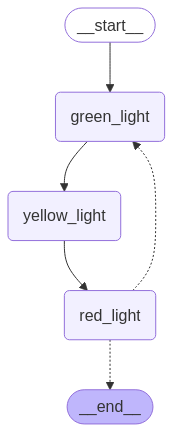

In [6]:
workflow = StateGraph(State)
workflow.add_node(green_light)
workflow.add_node(yellow_light)
workflow.add_node(red_light)

workflow.add_edge(START, "green_light")
workflow.add_edge("green_light", "yellow_light")
workflow.add_edge("yellow_light", "red_light")

def should_repeat(state: State):
    repeat_mode = state.repeat_mode
    counter = state.counter
    if repeat_mode and counter <= 3:
        return "green_light"
    return END

workflow.add_conditional_edges(
    "red_light",
    should_repeat,
    ["green_light", END],
)

graph = workflow.compile()

display(
    Image(
        graph.get_graph().draw_mermaid_png()
    )
)

In [7]:
print("游뚽------------ TRAFFIC LIGHT CONTROLLER ------------游뚽")
controller = graph.invoke({"repeat_mode":True})
for message in controller['messages']:
    print(message)

游뚽------------ TRAFFIC LIGHT CONTROLLER ------------游뚽
游릭 Green Light! Traffic allowed for 60 seconds...
游리 Yellow Light! Traffic will change in 3 seconds...
游댮 Red Light! Traffic allowed for 15 seconds...
----------------------------------------------------
游릭 Green Light! Traffic allowed for 60 seconds...
游리 Yellow Light! Traffic will change in 3 seconds...
游댮 Red Light! Traffic allowed for 15 seconds...
----------------------------------------------------
游릭 Green Light! Traffic allowed for 60 seconds...
游리 Yellow Light! Traffic will change in 3 seconds...
游댮 Red Light! Traffic allowed for 15 seconds...
----------------------------------------------------
游릭 Green Light! Traffic allowed for 60 seconds...
游리 Yellow Light! Traffic will change in 3 seconds...
游댮 Red Light! Traffic allowed for 15 seconds...
----------------------------------------------------
